# Modeling Forest Fires Using Cellular Automata 
## Authors: Ali Kazmi, Kenji Bomar 
## CX 4230 Project 2 

Using Cellular Automata to model a Forest Fire. (Sayama 206, 11.9). Estimate the critical percolation threshold for the same forest fire model but with von neumann neighborhood models. Confirm the results in simulations (sayama 12.9). What would happen if the space of the forest fire propagation were 1D or 3D? Construct renormalization group analysis to see what happens in those cases (Sayama 12.10).


## Abstract  
- put smt here about what cellular automata is and what they will learn. Also put a paragraph on the SUI: forest fires, their impact, etc. Talk about other ways to study the system, but give some reasons why CA are good. (~2 para long. See the example on recrystallization) 

## Outline: 
### 0: Introduction to Cellular Automata
#### 0.1: Terminology 
#### 0.2: Code for a simple 1D CA: Sierpinski Triangle 
#### 0.3: Other cool 1D CA 
#### 0.4: Classic 2D Cellular Automata: Game of Life
### 1: Applications to Forest fires
- #### 1.1: A simple cellular automata model of forest fires 
- #### 1.2 Animation?
- #### 1.3: Analysis of our simple cellular automata model
- #### 1.4: Stochastic additions to our model (?)
- #### 1.5: 3D CA model
- #### 1.6: Renormalization Group Analysis 
### 2: Literature Review
- #### 2.5: Citations

### 3: a data driven Cellular Automata model of forest fires (?) 

## 0: 1D Cellular Automata 
### 0.1: terminology 
A Cellular Automata (CA from here on) is a model built of cells on a grid. For now, we'll keep this grid one dimensional, but it can theoretically go to any dimension. Each cell is either alive or dead. Each cell has a neighborhood 

### 0.2: Sierpinski Triangle





/Users/ali/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


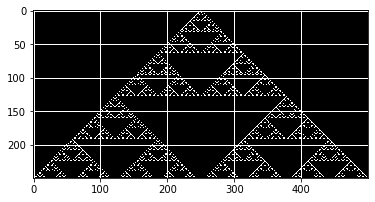

In [199]:
# In this we will be implementing a one dimensional cellular automata. It will appear to be the sierpienski triangle! 
# Note: We are laying one generation below the preceding one, so it will output a 2d grid. It is not two dimensional though!
# The output simply shows the evolution of the system over time. (The top is T=0. Time progresses downwards)
# We use standard python libraries for our plotting and data structures.
# We use alive (white) as 1 and dead (black) as 0.  
# If you are not familiar with python, try an introductory tutorial on that first
#This example shows fractal behavior arising from a 1D cellular automata. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Here we define the rules of transition. This will determine how the system evolves 
def transition(l,m,r):
    if(l == 1 and m==1 and r ==1):
        return 0
    elif (l == 1 and m == 1 and r==0):
        return 1
    elif (l == 1 and m == 0 and r==1):
        return 0
    elif (l == 1 and m == 0 and r==0):
        return 1
    elif (l == 0 and m == 1 and r==1):
        return 1
    elif (l == 0 and m == 1 and r==0):
        return 0
    elif (l == 0 and m == 0 and r == 1):
        return 1
    elif (l == 0 and m == 0 and r==0):
        return 0
    
#Here we apply the rules on the passed in array of cells. 
#Visualize looking at a one dimensional state (an array) and returning the next state 
def rules(cellsrow,w):
    # Use a temporary array because the transitions are based only on current states. 
    temp = np.copy(cellsrow)
    if(cellsrow.item(cellsrow.size-2)==1): #this case exists if we are going off the grid in the next iteration. Keeps viualization clean 
        return np.zeros((w,), dtype=int)
    for i in range(1, cellsrow.size - 1):
        #First look in the neighborhood. Be careful of edges! For now, we will leave them constant by changing the loop boundaries 
        l=cellsrow.item(i-1)
        m=cellsrow.item(i)
        r=cellsrow.item(i+1)
        temp[i] = transition(l,m,r)
    return temp

w=100 #experiment with this! It is the width of the grid. This visualization will run to fit it automatically. Try w = 50 and w = 500


z=np.zeros((w,), dtype=int)
cells=np.array([z])
cells.itemset(int(w/2),1)
#print(cells)
h=int(w/2) #height of our visualization. The number of generations, in other words 
for x in range (1, h):
    newrow=rules(cells[x-1,:],w)
    cells = np.append(cells,[newrow], axis=0)

#now, do the plot. 
fig = plt.figure()
plt.grid(color='w', linestyle='-', linewidth=1)
ax = fig.add_subplot()
ax.imshow(cells, interpolation='nearest', cmap=cm.Greys_r) #Try different color maps!. Later in the tutorial, we will use fire colors
plt.show()

## 1: Applications to Forest Fires
### 1.1: A simple CA model for forest fires
In a paper from 2006, some simple rules were devised to model forest fires. Here we will present those ideas and show them in action. https://bib.irb.hr/datoteka/278897.Ljiljana_Bodrozic_ceepus2006_2.pdf 

## 2: Literature Review
Currently, many methods have been attempted to model forest fires. Many different models have been attempted, but here I wiil focus on cellular automata based studies. 

Traditional studies have focused on creating rule based Cellular Automata based on scientific principles. For instance, a study from 2006 focused on predicting the spread of the fires based on the transfer of fractional burned area, with factors of propagation from diagonal neighbor cells and a rate for the spread of fire<sup>1</sup>. A 2004 study<sup>2</sup> focused on using the same fire spread realtionships (developed by Rothermel in 1972) but on a hexagonal grid instead of a square one. One 2016 paper<sup>6</sup> outlines common rules and provides a Cellular Automata simulator for Forest Fires. 

A more recent paper<sup>3</sup> used a data driven approach to cellular automata. This model was actually tested using data collected from five fires in the United States, and achieved high levels of accuracy in simulating the spread of the fires. What was really unique about this study though was that instead of focusing on defining every aspect of the transition rules as usually done in a Cellular Automaton model it used a feedforward neural network known as the "Extreme Learning Machine." The ELM performed well in predicting each cell's igniting probability. It also was able to account for the impact of vind velocity on the fire spreading pattern. The ELM was integrated with the CA model because a rule based transition system was still implemented, but each iteration the ELM created the transition rules. This could be an interesting avenue to attempt to use within our study.

A 2017 paper<sup>4</sup> took similar data-driven cellular automata ideas (granted more advanced, as around a decade had passed) and parallelized it, providing GPU implementations of a fully parallel Fuzzy CA model. It was able to achieve parallel speedup, and used data from real fires to improve accuracy. 

Some studies don't focus on adding new details, but instead emphasize different factors of the CA model. For instance, one study<sup>5</sup> suggested that the optimal time step for the forest fire spread CA model is 1/8 of the time taken for the cellular material to be completely combusted. The same article also mentioned being reversible: it can identify fire source points! 

In [139]:
import numpy

a = numpy.array([[1, 2, 3]])

a = numpy.append(a, [[50, 60, 70]], axis = 0)

print(a)

[[ 1  2  3]
 [50 60 70]]


## 2.5: Citations 
1) Encinas, A. Hernández, et al. “Simulation of Forest Fire Fronts Using Cellular Automata.” Advances in Engineering Software, vol. 38, no. 6, 2007, pp. 372–378., doi:10.1016/j.advengsoft.2006.09.002.

2) Trunfio, Giuseppe A. “Predicting Wildfire Spreading Through a Hexagonal Cellular Automata Model.” Lecture Notes in Computer Science Cellular Automata, 2004, pp. 385–394., doi:10.1007/978-3-540-30479-1_40.

3) Zheng, Zhong, et al. “Forest Fire Spread Simulating Model Using Cellular Automaton with Extreme Learning Machine.” Ecological Modelling, vol. 348, 2017, pp. 33–43., doi:10.1016/j.ecolmodel.2016.12.022.

4) Ntinas, Vasileios G., et al. “Parallel Fuzzy Cellular Automata for Data-Driven Simulation of Wildfire Spreading.” Journal of Computational Science, vol. 21, 2017, pp. 469–485., doi:10.1016/j.jocs.2016.08.003.

5) Rui, Xiaoping, et al. “Forest Fire Spread Simulation Algorithm Based on Cellular Automata.” Natural Hazards, vol. 91, no. 1, 2017, pp. 309–319., doi:10.1007/s11069-017-3127-5.

6) Xuehua, Wang, et al. “A Cellular Automata Model for Forest Fire Spreading Simulation.” 2016 IEEE Symposium Series on Computational Intelligence (SSCI), 2016, doi:10.1109/ssci.2016.7849971.

7) 

8) 

9) 

## Future Work 
As of the checkpoint, we have made progress. There is still a lot to get done though! Below is our division of labor. 

Ali: 

Kenji: 
